In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import urllib.request


import ssl
ssl.create_default_https_context = ssl._create_unverified_context


url = "https://en.wikipedia.org/wiki/Median_income"
page = urllib.request.urlopen(url)

soup = BeautifulSoup(page,"lxml")


In [2]:
# can uncomment when it needed to run
#print(soup.prettify())

In [3]:
soup.title
soup.title.string


'Median income - Wikipedia'

In [4]:
all_sortable_tables = soup.find_all('table', class_='sortable wikitable')

#all_sortable_tables

In [5]:
# We want the 2nd 'wikitable sortable' 
right_table = all_sortable_tables[0]
right_table

<table class="sortable wikitable">
<tbody><tr>
<th>Rank
</th>
<th>Country
</th>
<th>Median income 2010 (US$, <a href="/wiki/Purchasing_power_parity" title="Purchasing power parity">PPP</a>)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th>Year
</th></tr>
<tr>
<td>1</td>
<td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="1000" decoding="async" height="14" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/23px-Flag_of_Luxembourg.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/35px-Flag_of_Luxembourg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/46px-Flag_of_Luxembourg.svg.png 2x" width="23"/> </span><a href="/wiki/Luxembourg" title="Luxembourg">Luxembourg</a></td>
<td>43,708</td>
<td>2018
</td></tr>
<tr>
<td>2</td>
<td align="left"><span class="flagicon"><img alt="" class="thum

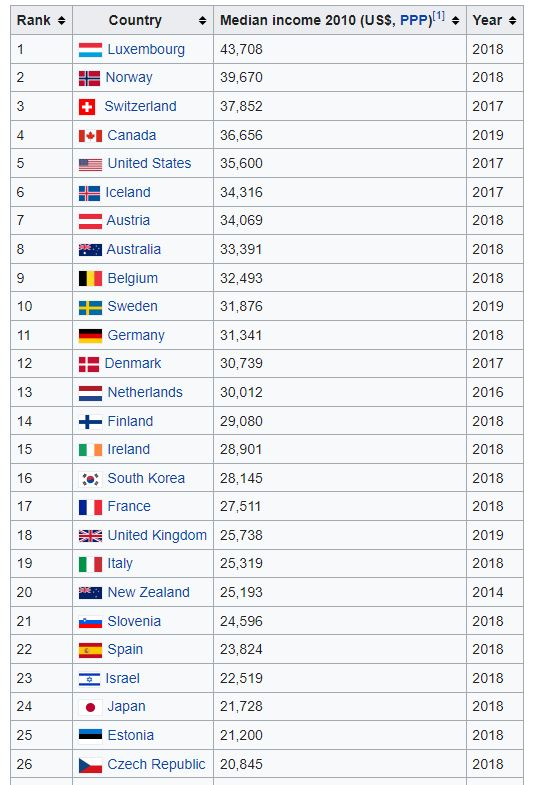

In [6]:
from IPython.display import Image
Image("median-income-2010.jpg")

In [7]:
A=[]
B=[]
C=[]
D=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==4:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))

In [8]:
import pandas as pd
df=pd.DataFrame(A,columns=['Rank'])
df['Country']=B
df['Median income 2010(US$)']=C
df['Year']=D

df = df.replace('\n','', regex=True)
df

,Rank,Country,Median income 2010(US$),Year
0,1,,"43,708",2018
1,2,,"39,670",2018
2,3,,"37,852",2017
3,4,,"36,656",2019
4,5,,"35,600",2017
5,6,,"34,316",2017
6,7,,"34,069",2018
7,8,,"33,391",2018
8,9,,"32,493",2018
9,10,,"31,876",2019


In [9]:
A=[]
B=[]
C=[]
D=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==4:
        A.append(cells[0].find(text=True))
        mlnk=cells[1].findAll('a')
        B.append(mlnk[0].contents[0])
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))
        



In [10]:
import pandas as pd
df=pd.DataFrame(A,columns=['Rank'])
df['County']=B
df['Median income 2010 (US$)']=C
df['Year']=D

df = df.replace('\n','', regex=True)
df

,Rank,County,Median income 2010 (US$),Year
0,1,Luxembourg,"43,708",2018
1,2,Norway,"39,670",2018
2,3,Switzerland,"37,852",2017
3,4,Canada,"36,656",2019
4,5,United States,"35,600",2017
5,6,Iceland,"34,316",2017
6,7,Austria,"34,069",2018
7,8,Australia,"33,391",2018
8,9,Belgium,"32,493",2018
9,10,Sweden,"31,876",2019


In [11]:
df.to_csv("CSC221_webscrape_data.csv", index = False)
#df